In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cf_df = pd.read_csv("/content/drive/MyDrive/EC439/cf_df.csv")

In [ ]:
# Separate features (X) and target (Y)
X_cf = cf_df.drop(columns=['Fraud', 'Period End Date','Company name'])  # All columns except 'Fraud'
Y_cf = cf_df['Fraud']  # Only the 'Fraud' column

<ipython-input-7-7dd03fe4d9b0>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-7-7dd03fe4d9b0>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-7-7dd03fe4d9b0>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-7-7dd03fe4d9b0>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1
<ipython-input-7-7dd03fe4d9b0>:14: UserWarning: set_ticklabels() should only be 

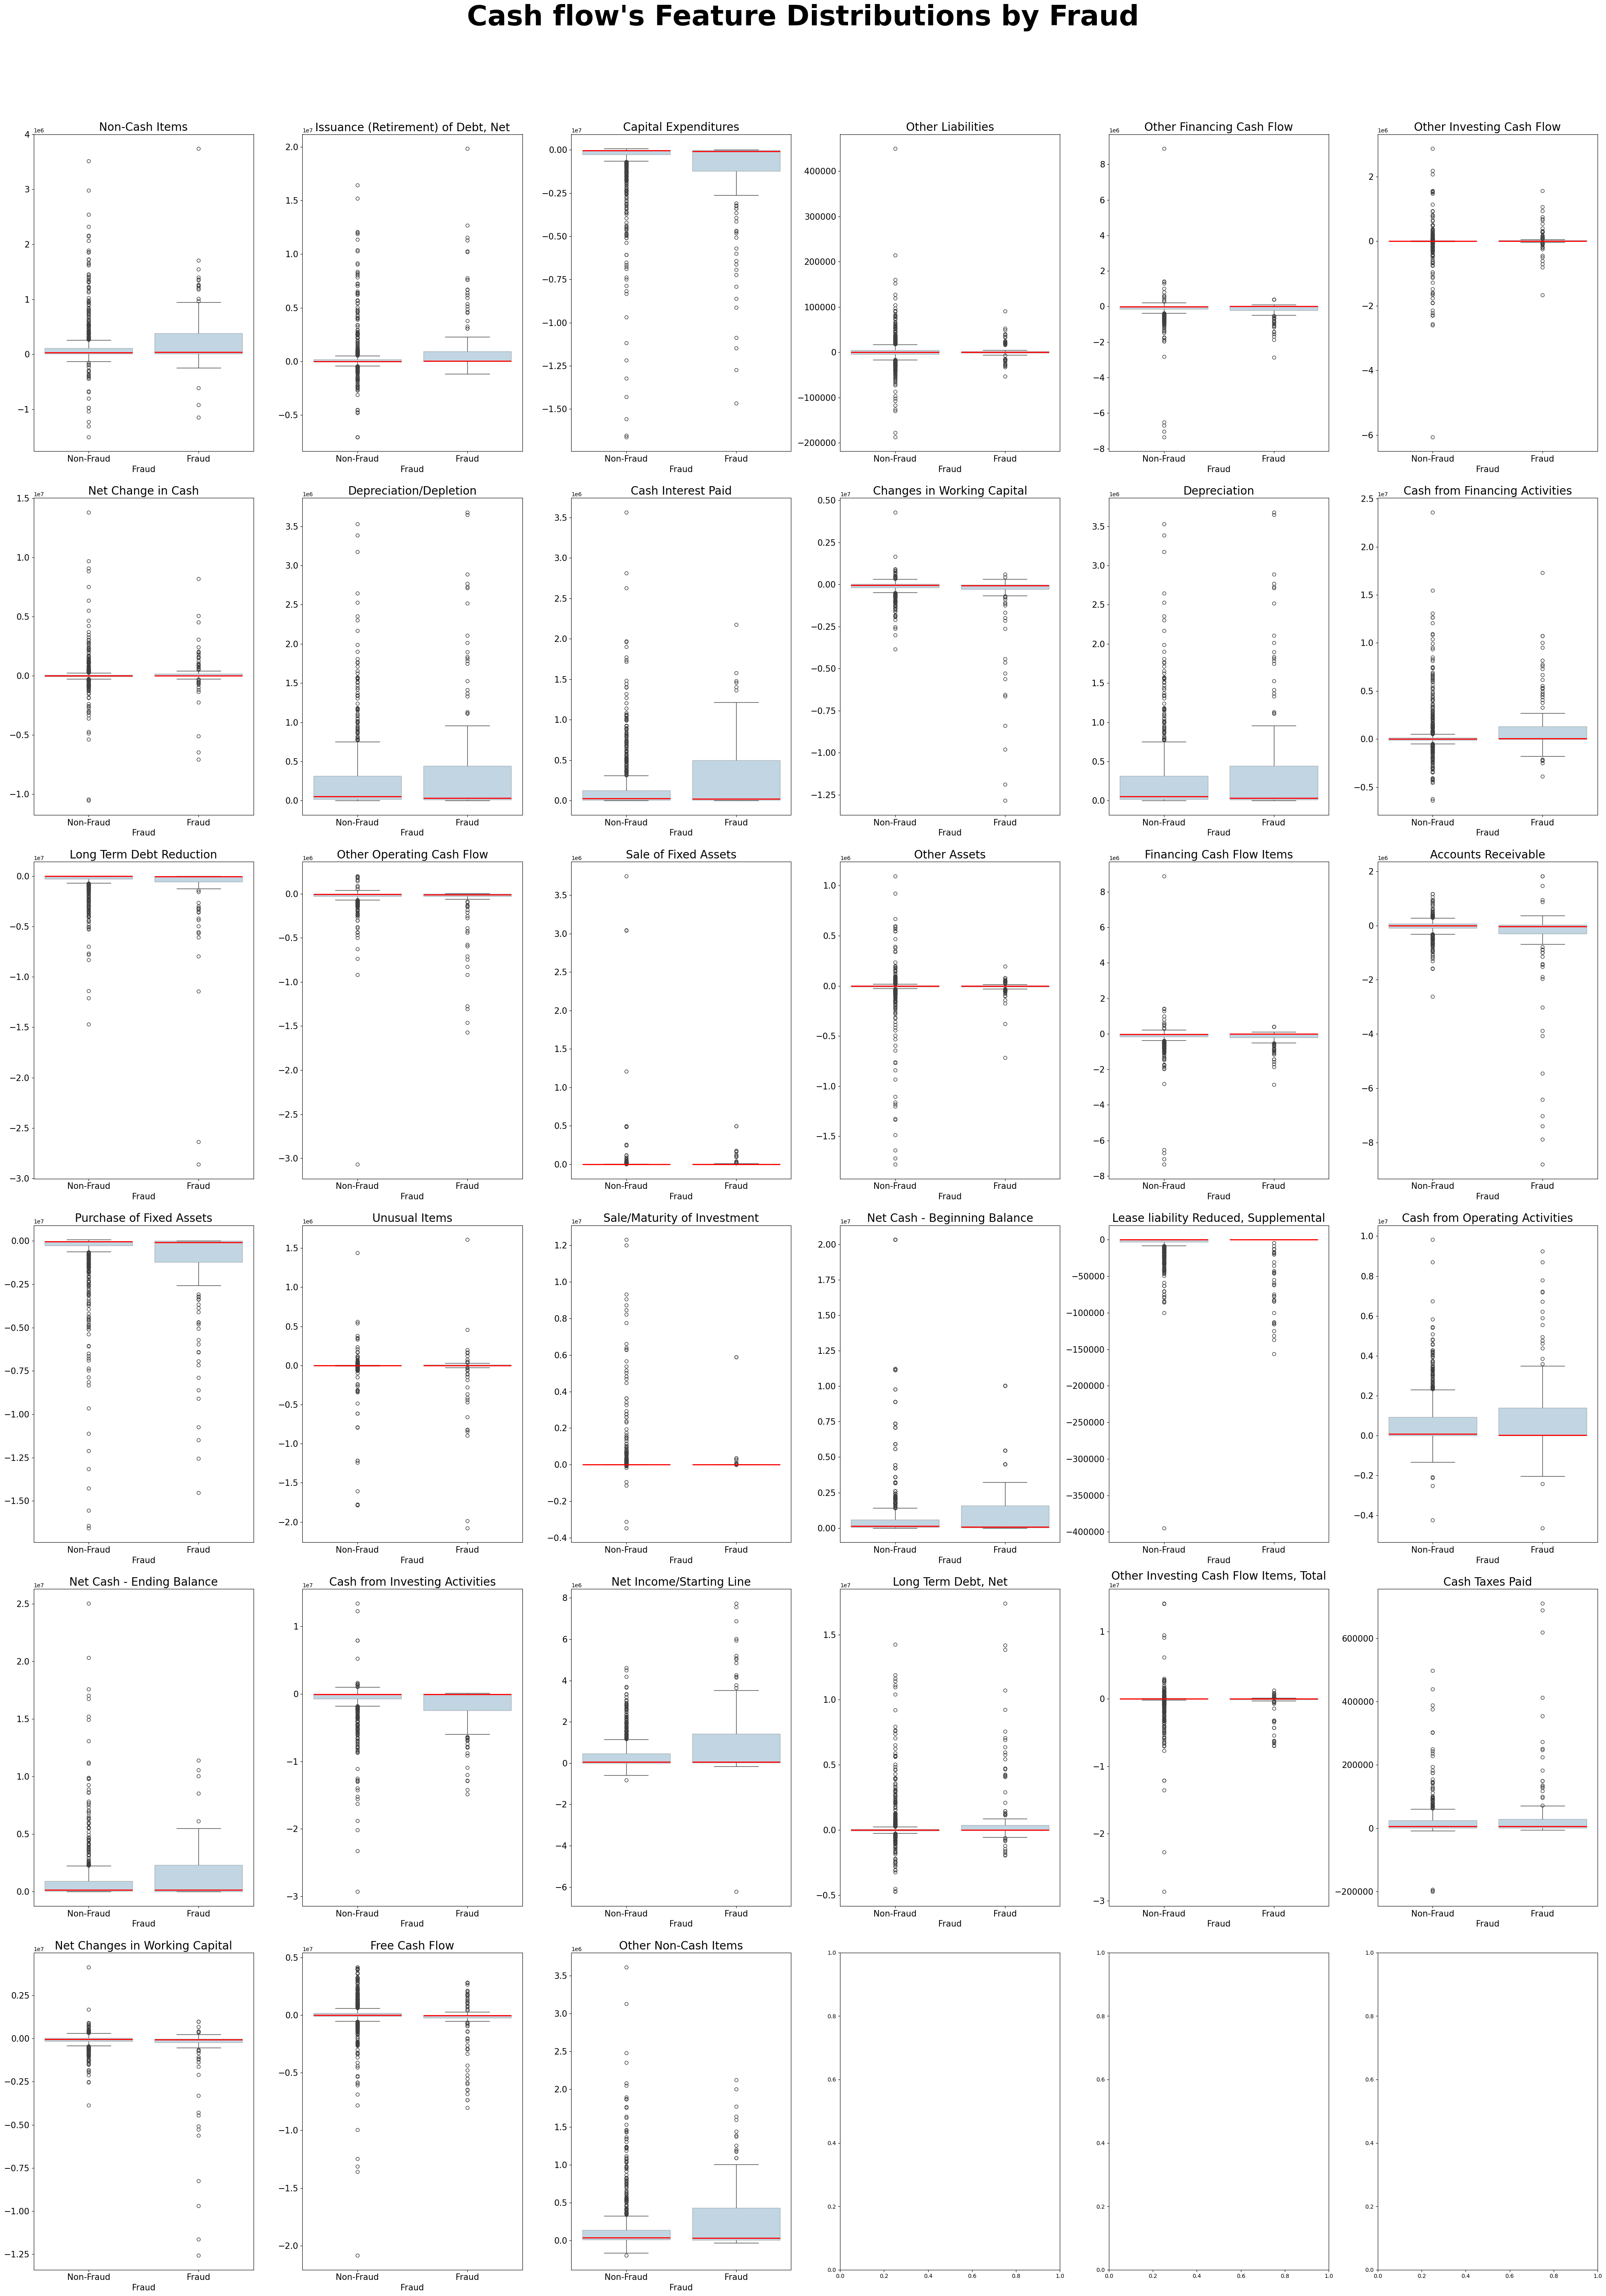

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def BoxPlot(data, col, hue, ax):
    sns.boxplot(x=hue, y=col, data=data, ax=ax,
                boxprops=dict(alpha=0.3, linewidth=1),
                medianprops=dict(color="red", linewidth=2))
    ax.set_title(col, fontsize=20)
    ax.set_xlabel("Fraud", fontsize=15)
    ax.set_ylabel("")
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xticklabels(['Non-Fraud', 'Fraud']) # เปลี่ยนชื่อ 0 และ 1

cf_cols = X_cf.columns

# Calculate grid dimensions for 42 plots
n_cols = 6  # Number of columns in the grid
n_rows = math.ceil(len(cf_cols) / n_cols)  # Calculate number of rows

# Create subplots with adjusted grid size
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(40, 60))  # Adjust figsize
fig.suptitle("Cash flow's Feature Distributions by Fraud", fontsize=50, weight='bold')

# Loop to create box plots for all 42 features
for i, col in enumerate(cf_cols):
    row = i // n_cols
    col_num = i % n_cols
    BoxPlot(pd.concat([X_cf, Y_cf], axis=1), col, hue="Fraud", ax=axes[row, col_num])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('balance_sheet_feature_distributions_boxplot_all.png')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_by_group(df, group_col, cols_to_normalize):
    """
    Normalizes specified columns within groups of a DataFrame.

    Args:
        df: DataFrame to normalize.
        group_col: Column name to group by.
        cols_to_normalize: List of column names to normalize.

    Returns:
        DataFrame with normalized columns.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Group the DataFrame by the specified column
    for group, group_data in df_normalized.groupby(group_col):
        # Create a MinMaxScaler object
        scaler = MinMaxScaler()

        # Fit the scaler to the group data for the specified columns
        scaler.fit(group_data[cols_to_normalize])

        # Transform the group data and update the original DataFrame
        df_normalized.loc[group_data.index, cols_to_normalize] = scaler.transform(group_data[cols_to_normalize])

    return df_normalized

# Get columns to normalize (excluding 'Company name', 'Period End Date', 'Fraud')
cols_to_normalize = [col for col in cf_df.columns if col not in ['Company name', 'Period End Date', 'Fraud']]

# Normalize cf_df
cf_df_normalized = normalize_by_group(cf_df, 'Company name', cols_to_normalize)

# Display the normalized DataFrame
cf_df_normalized.head()

,Period End Date,Non-Cash Items,"Issuance (Retirement) of Debt, Net",Capital Expenditures,Other Liabilities,Other Financing Cash Flow,Other Investing Cash Flow,Net Change in Cash,Depreciation/Depletion,Cash Interest Paid,...,Cash from Investing Activities,Net Income/Starting Line,"Long Term Debt, Net","Other Investing Cash Flow Items, Total",Cash Taxes Paid,Net Changes in Working Capital,Free Cash Flow,Other Non-Cash Items,Company name,Fraud
0,30-Jun-2004,0.793638,0.340841,0.917347,1.000000,1.0,0.676724,0.621870,0.437577,0.005096,...,0.917157,0.217011,0.422855,0.622023,0.112915,0.493514,0.799210,0.048771,AKR,0
1,31-Dec-2004,0.000000,0.385589,0.830766,0.975373,1.0,0.676724,0.547415,0.927476,0.254021,...,0.830697,1.000000,0.442545,0.624011,0.137158,0.428646,0.723606,0.023713,AKR,0
2,31-Mar-2005,0.797495,0.263162,0.917212,0.279882,1.0,0.000000,0.474524,0.000000,0.022968,...,0.910188,0.186277,0.269855,0.573118,0.097901,0.433717,0.667594,0.080311,AKR,0
3,30-Jun-2005,0.797220,0.350966,0.904728,0.396051,1.0,0.000000,0.518134,0.088752,0.056369,...,0.897681,0.221318,0.255835,0.573118,0.106829,0.180858,0.573833,0.077710,AKR,0
4,30-Sep-2005,0.802723,0.315637,0.888775,0.404352,1.0,0.000000,0.541272,0.178662,0.131473,...,0.881699,0.253348,0.244482,0.573118,0.137068,0.162100,0.624706,0.130190,AKR,0


In [ ]:
# Define features (X) and target (Y)
X_cf = cf_df_normalized.drop(columns=['Fraud','Period End Date','Company name'])  # Features: All columns except 'Fraud'
Y_cf = cf_df_normalized['Fraud']  # Target: 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_cf.shape)
print("Shape of Y:", Y_cf.shape)

Shape of X: (905, 33)
Shape of Y: (905,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_cf, Y_cf, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (724, 33)
Shape of X_test: (181, 33)
Shape of Y_train: (724,)
Shape of Y_test: (181,)


In [ ]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
def evaluate_model(predictions, Y_test):
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.9669
Precision: 0.9643
Recall: 0.8438
F1 Score: 0.9000

Random Forest Performance:
Accuracy: 0.9448
Precision: 0.9583
Recall: 0.7188
F1 Score: 0.8214


In [ ]:
from sklearn.model_selection import GridSearchCV

# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8740922870953831


In [ ]:
# Get feature coefficients from the Logistic Regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to store feature coefficients along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient value in descending order
feature_importances_df['Absolute_Coefficient'] = abs(feature_importances_df['Coefficient'])
feature_importances_df = feature_importances_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                                   Feature  Coefficient  Absolute_Coefficient
26                Net Income/Starting Line     3.156905              3.156905
19                           Unusual Items     2.892380              2.892380
15                            Other Assets     2.621847              2.621847
30          Net Changes in Working Capital     2.292034              2.292034
17                     Accounts Receivable     2.180074              2.180074
9               Changes in Working Capital     1.935350              1.935350
28  Other Investing Cash Flow Items, Total     1.674712              1.674712
1       Issuance (Retirement) of Debt, Net    -1.532601              1.532601
22   Lease liability Reduced, Supplemental    -1.424284              1.424284
0                           Non-Cash Items    -1.184575              1.184575


In [ ]:
# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                                   Feature  Importance
9               Changes in Working Capital    0.118894
17                     Accounts Receivable    0.108462
1       Issuance (Retirement) of Debt, Net    0.076968
30          Net Changes in Working Capital    0.076523
28  Other Investing Cash Flow Items, Total    0.062575
19                           Unusual Items    0.052842
32                    Other Non-Cash Items    0.051074
25          Cash from Investing Activities    0.046722
6                       Net Change in Cash    0.027892
7                   Depreciation/Depletion    0.027548
